In [1]:
import cv2
import numpy as np

Image Translation/Shifting

In [2]:
img = cv2.imread('sachin.jpg')

In [3]:
# get the shape
height, width, _ = img.shape

In [15]:
quarter_height, quarter_width = height//4, width//4    # values to make a shift by how much degrees

In [5]:
T = np.float32([[1,0, quarter_width], [0, 1, quarter_height]])

In [6]:
T

array([[  1.,   0., 212.],
       [  0.,   1., 268.]], dtype=float32)

In [7]:
img_trans = cv2.warpAffine(img, T, (width, height))

In [8]:
cv2.imshow('translated image', img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
T = np.float32([[1,0, 50], [0, 1, 100]])

In [10]:
img_trans = cv2.warpAffine(img, T, (width, height))

cv2.imshow('translated image', img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
T = np.float32([[1,0, -100], [0, 1, -50]])

In [23]:
img_trans = cv2.warpAffine(img, T, (width, height))

cv2.imshow('translated image', img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

Image Rotation

In [25]:
img_rot = cv2.rotate(img, cv2.ROTATE_180)

In [26]:
cv2.imshow('rotated image', img_rot)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

cv2.imshow('rotated image', img_rot)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
img_rot = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow('rotated image', img_rot)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
# GET THE CENTER VALUE
center = img.shape[1] // 2, img.shape[0] // 2

In [32]:
center

(425, 537)

In [33]:
# Create the rotation matrix
angle = 60
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

In [34]:
rotation_matrix

array([[ 5.00000000e-01,  8.66025404e-01, -2.52555642e+02],
       [-8.66025404e-01,  5.00000000e-01,  6.36560797e+02]])

In [35]:
# create the rotated image
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))

In [36]:
cv2.imshow('rotated image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
# Create the rotation matrix
angle = 60
rotation_matrix = cv2.getRotationMatrix2D((500,500), 75, 1.0)

In [42]:
# create the rotated image
rotated_image = cv2.warpAffine(img, rotation_matrix, (800, 800))

In [43]:
cv2.imshow('rotated image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
# Anticlockwise
angle = 60
rotation_matrix = cv2.getRotationMatrix2D((500,500), -75, 1.0)

# create the rotated image
rotated_image = cv2.warpAffine(img, rotation_matrix, (800, 800))

cv2.imshow('rotated image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Rotation using PIL

In [46]:
from PIL import Image

In [47]:
img_pil = Image.open('sachin.jpg')

In [48]:
rot_img = img_pil.transpose(Image.ROTATE_90)

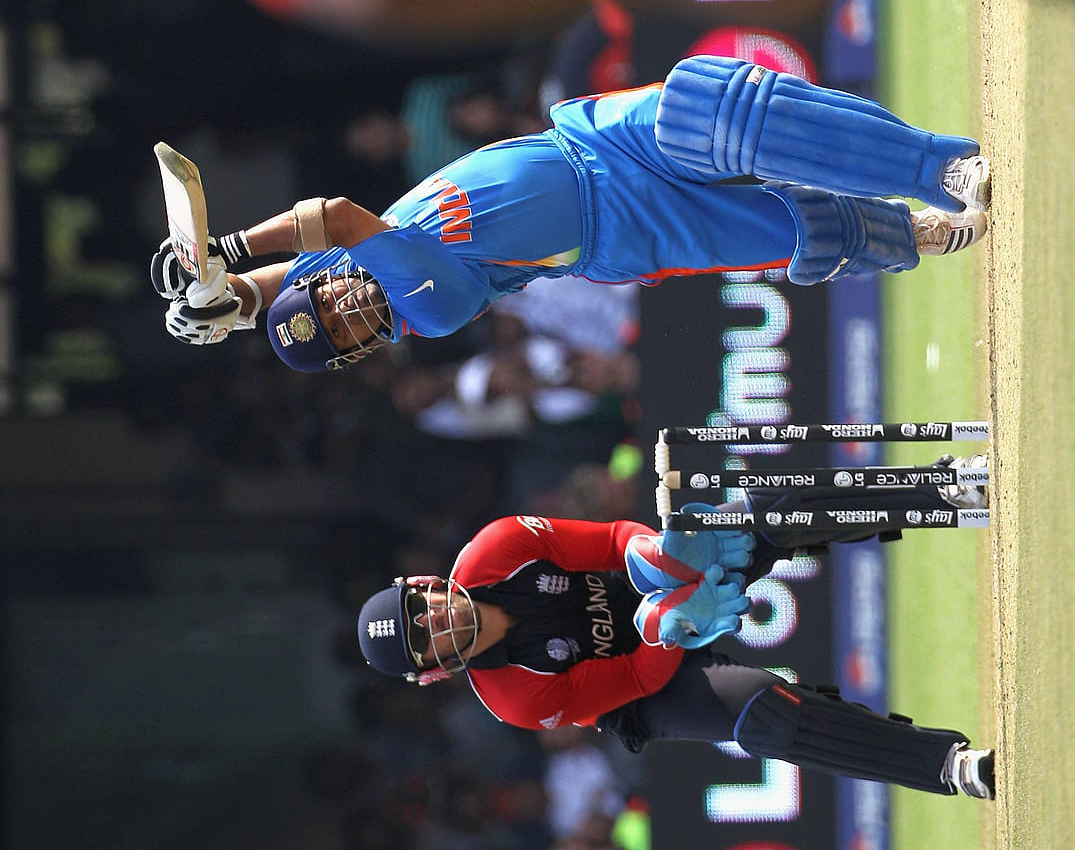

In [49]:
rot_img

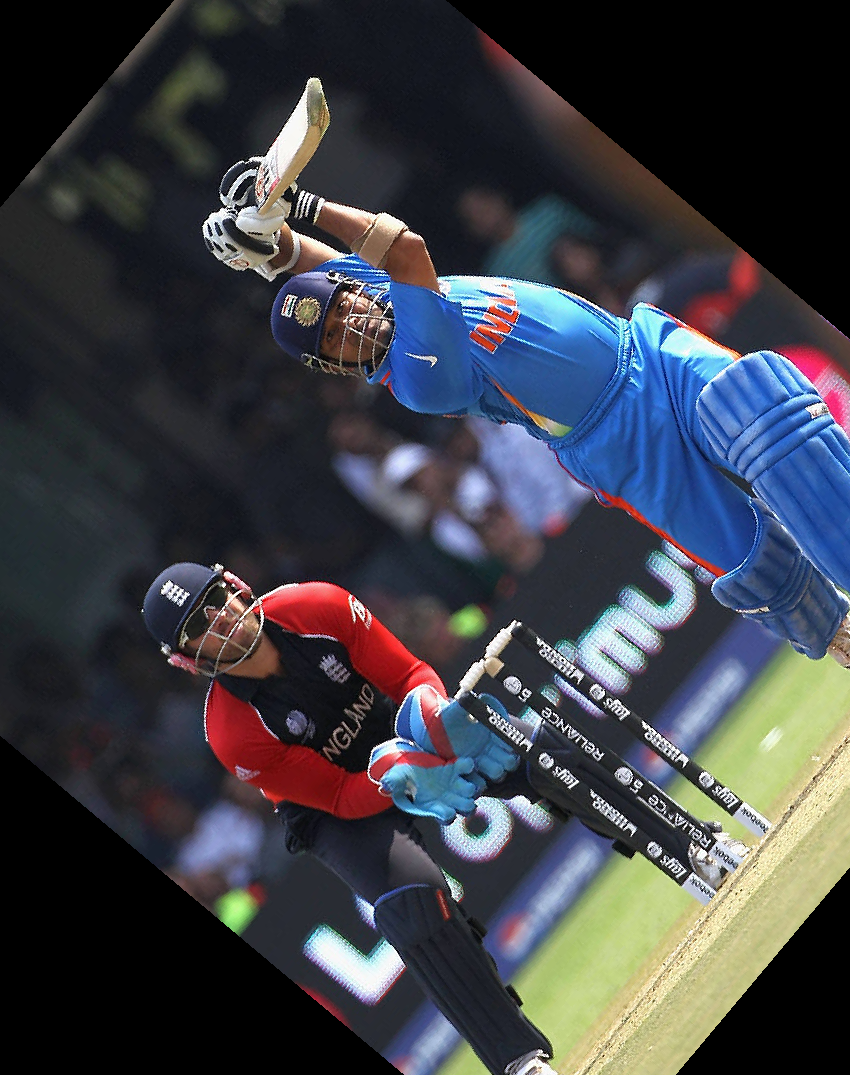

In [50]:
img_pil.rotate(50)

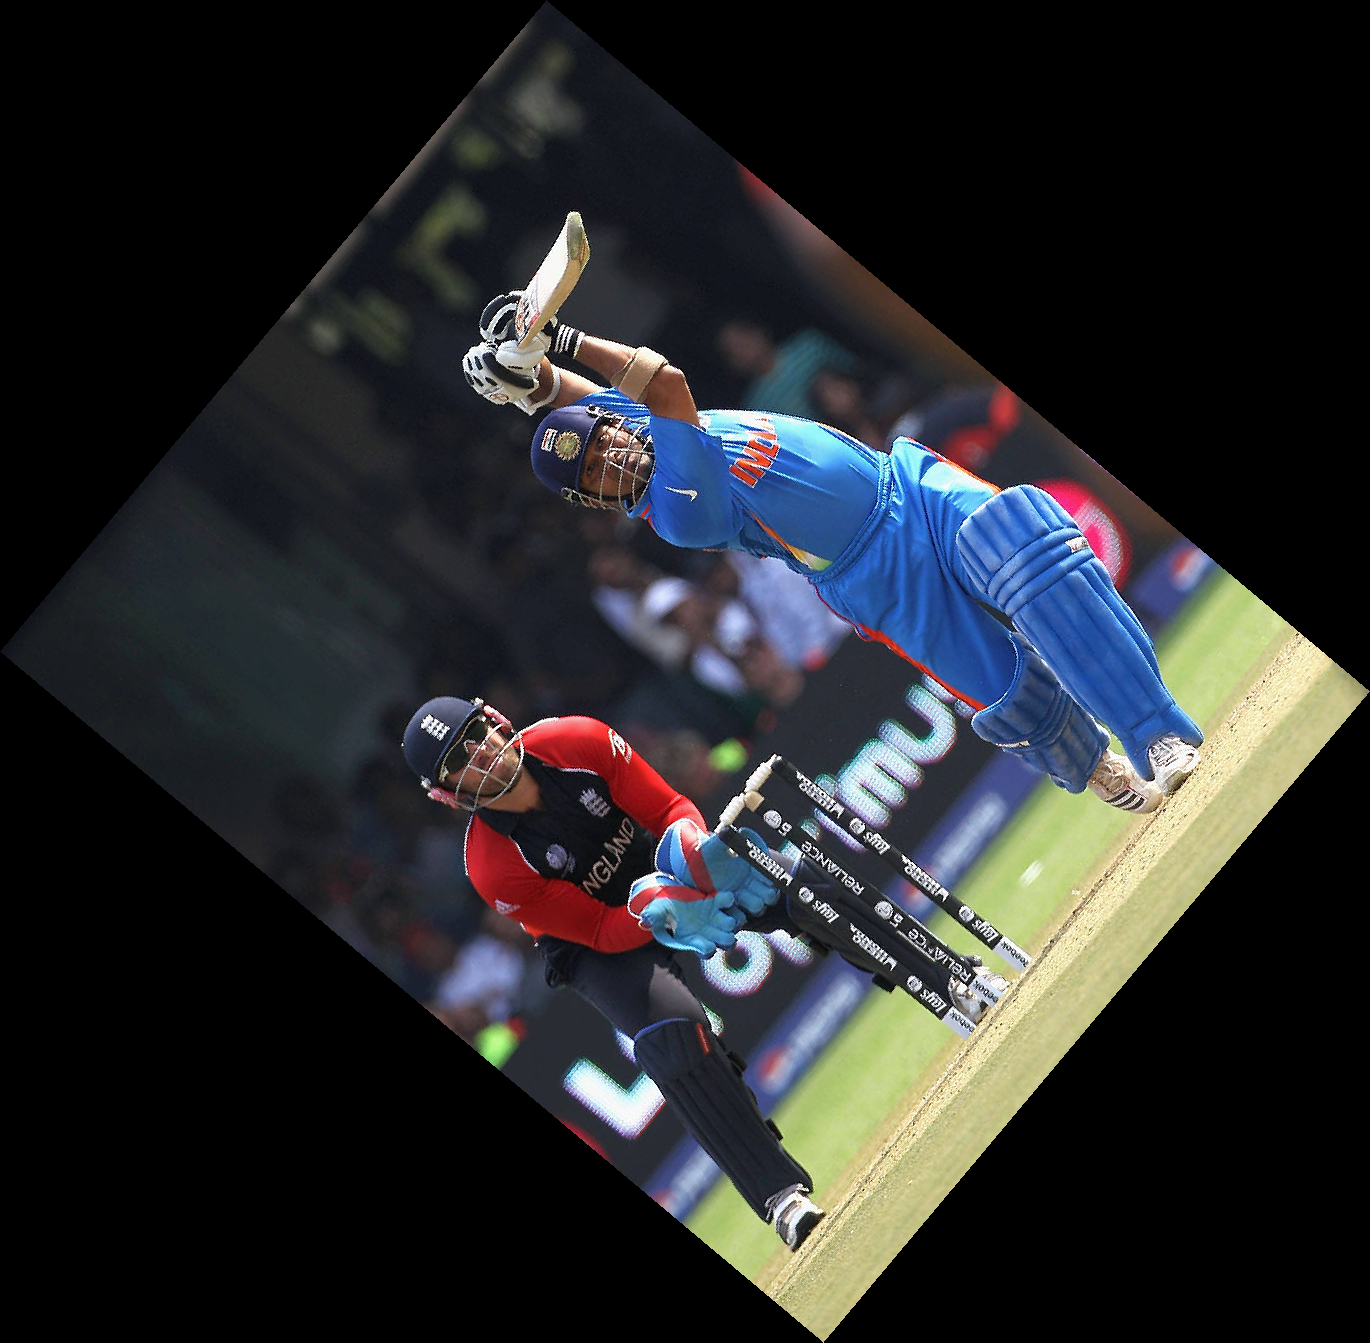

In [51]:
img_pil.rotate(50, expand=True)

Image Resizing

In [53]:
help(cv2.resize)

Help on built-in function resize:

resize(...)
    resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
    .   @brief Resizes an image.
    .
    .   The function resize resizes the image src down to or up to the specified size. Note that the
    .   initial dst type or size are not taken into account. Instead, the size and type are derived from
    .   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
    .   you may call the function as follows:
    .   @code
    .       // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
    .       resize(src, dst, dst.size(), 0, 0, interpolation);
    .   @endcode
    .   If you want to decimate the image by factor of 2 in each direction, you can call the function this
    .   way:
    .   @code
    .       // specify fx and fy and let the function compute the destination image size.
    .       resize(src, dst, Size(), 0.5, 0.5, interpolation);
    .   @endcode
   

In [59]:
resized_image = cv2.resize(img, (500, 700))

In [60]:
cv2.imshow('resized image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Image Scaling

In [70]:
rescaled_image = cv2.resize(img, None, fx=0.5, fy=0.5)

In [71]:
cv2.imshow('resized image', rescaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:
rescaled_image = cv2.resize(img, None, fx=1.75, fy=0.80)

cv2.imshow('resized image', rescaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resizing using PIL

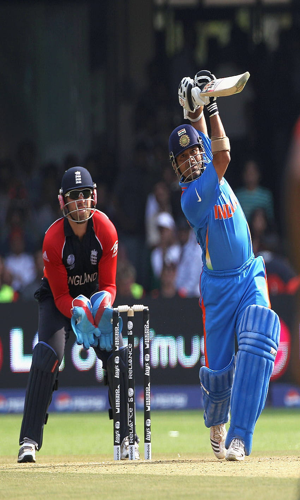

In [74]:
img_pil.resize((300,500))

Resizing using skimage

In [77]:
from skimage.transform import resize
import matplotlib.pyplot as plt

In [78]:
img_ski = plt.imread('sachin.jpg')

In [82]:
res_img = resize(img_ski, (400, 250))

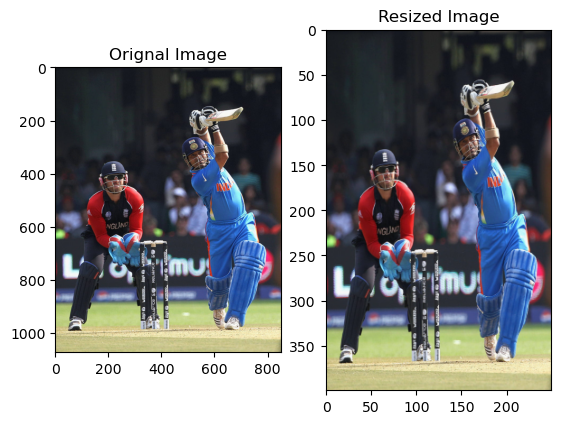

In [83]:
plt.subplot(1,2,1)
plt.title('Orignal Image')
plt.imshow(img_ski)

plt.subplot(1,2,2)
plt.title('Resized Image')
plt.imshow(res_img)

Image Flipping

In [86]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# horizontal flip
fip_hor = cv2.flip(img_rgb, 0)

# vertical flip
fip_ver = cv2.flip(img_rgb, 1)

# diagonal flip
fip_dig = cv2.flip(img_rgb, -1)

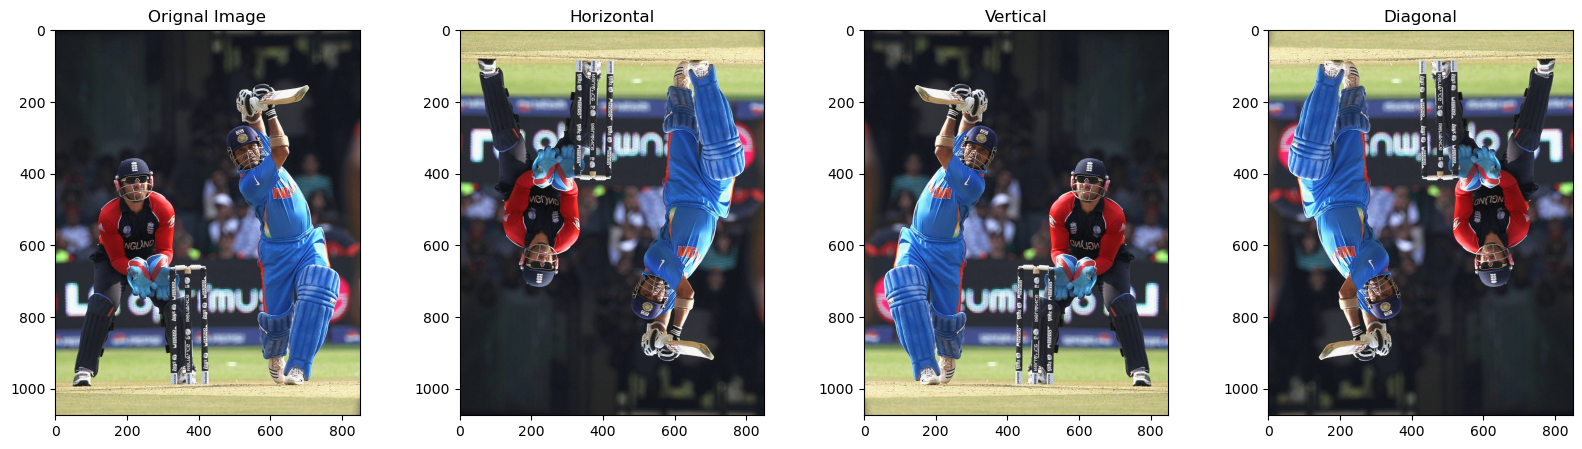

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('Orignal Image')
plt.imshow(img_rgb)

plt.subplot(1,4,2)
plt.title('Horizontal')
plt.imshow(fip_hor)

plt.subplot(1,4,3)
plt.title('Vertical')
plt.imshow(fip_ver)

plt.subplot(1,4,4)
plt.title('Diagonal')
plt.imshow(fip_dig)

In [88]:
img_ski = plt.imread('sachin.jpg')

In [90]:
height, width = img_ski.shape[0], img_ski.shape[1]

In [91]:
height, width

(1075, 850)

In [117]:
vertical = int(height*0.15)
horizontal = int(width*0.15)
vertical, horizontal

(161, 127)

In [118]:
crop = img_ski[horizontal:-horizontal,vertical:-vertical]

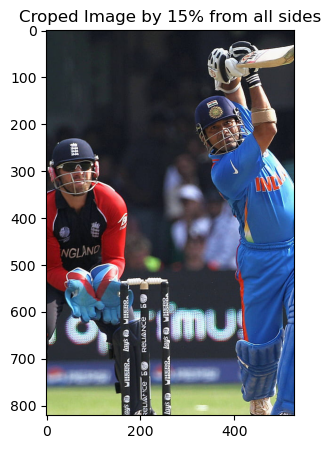

In [119]:
plt.figure(figsize=(20,5))
plt.title('Croped Image by 15% from all sides')
plt.imshow(crop)

In [113]:
crop.shape

(821, 528, 3)

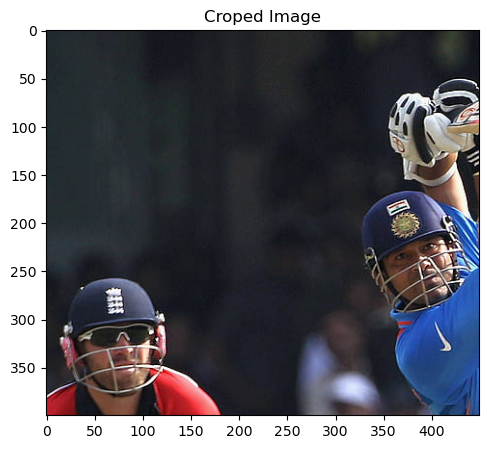

In [121]:
crop = img_ski[100:500,150:600]

plt.figure(figsize=(20,5))
plt.title('Croped Image')
plt.imshow(crop)

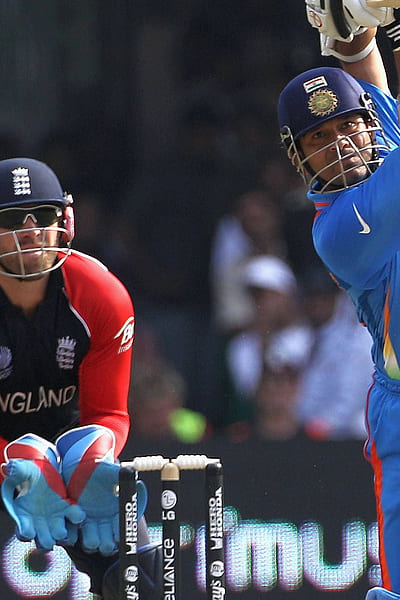

In [123]:
img_pil.crop((200,200,600,800))

Image Shearing

In [125]:
shear_x = 0.25
shear_y = 0.40

M = np.array([[1, shear_x, 0],
              [shear_y, 1, 0],
              [0, 0, 1]])

In [126]:
M

array([[1.  , 0.25, 0.  ],
       [0.4 , 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

In [128]:
img_shear = cv2.warpPerspective(img, M, (width, height))

cv2.imshow('sheared image', img_shear)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [130]:
img_res = cv2.resize(img, (500, 600))
img_shear = cv2.warpPerspective(img_res, M, (width, height))

cv2.imshow('sheared image', img_shear)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Affine Transformation

In [132]:
tx = 50 # Translation x
ty = 100 # Translation y
angle = 45 # rotation
scale = 0.8 # scaling factor
shear_x = 0.25 # tilt on x axis
shear_y = 0.3 # tilt on y axis 

# Define the affine transformation matrix 
M = np.float32([[scale * np.cos(np.radians(angle)), shear_x, tx], 
                [shear_y, scale * np.sin(np.radians(angle)), ty]])

In [134]:
M


array([[  0.56568545,   0.25      ,  50.        ],
       [  0.3       ,   0.56568545, 100.        ]], dtype=float32)

In [135]:
img_new = cv2.warpAffine(img, M, (width, height))

In [137]:
cv2.imshow('final image', img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()